In [2]:
import os
import sys
import math
import logging
from pathlib import Path

import numpy as np
import scipy as sp

%load_ext autoreload
%autoreload 2

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import seaborn as sns
sns.set_context("poster")
sns.set(rc={'figure.figsize': (16, 9.)})
sns.set_style("whitegrid")

import pandas as pd
pd.set_option("display.max_rows", 120)
pd.set_option("display.max_columns", 120)

logging.basicConfig(level=logging.INFO, stream=sys.stdout)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
from bhm_at_scale.plot import PlotStore, plot_densities
from bhm_at_scale.utils import make_intervals
from bhm_at_scale.model import Features

## Read results from notebook 2

In [4]:
df_stats = pd.read_csv('../data/result/stats.csv')
df_preds = pd.read_csv('../data/result/test_preds.csv')
df = pd.read_csv('../data/result/df.csv')
df_edf = pd.read_csv('../data/preprocessed/edf.csv')

## Plot predictions from test set

In [5]:
plot_store = PlotStore(df_orig=df, df_preds=df_preds)

In [26]:
store_id = np.random.randint(df_preds['StoreId'].min(), df_preds['StoreId'].max())
print(store_id)

1024


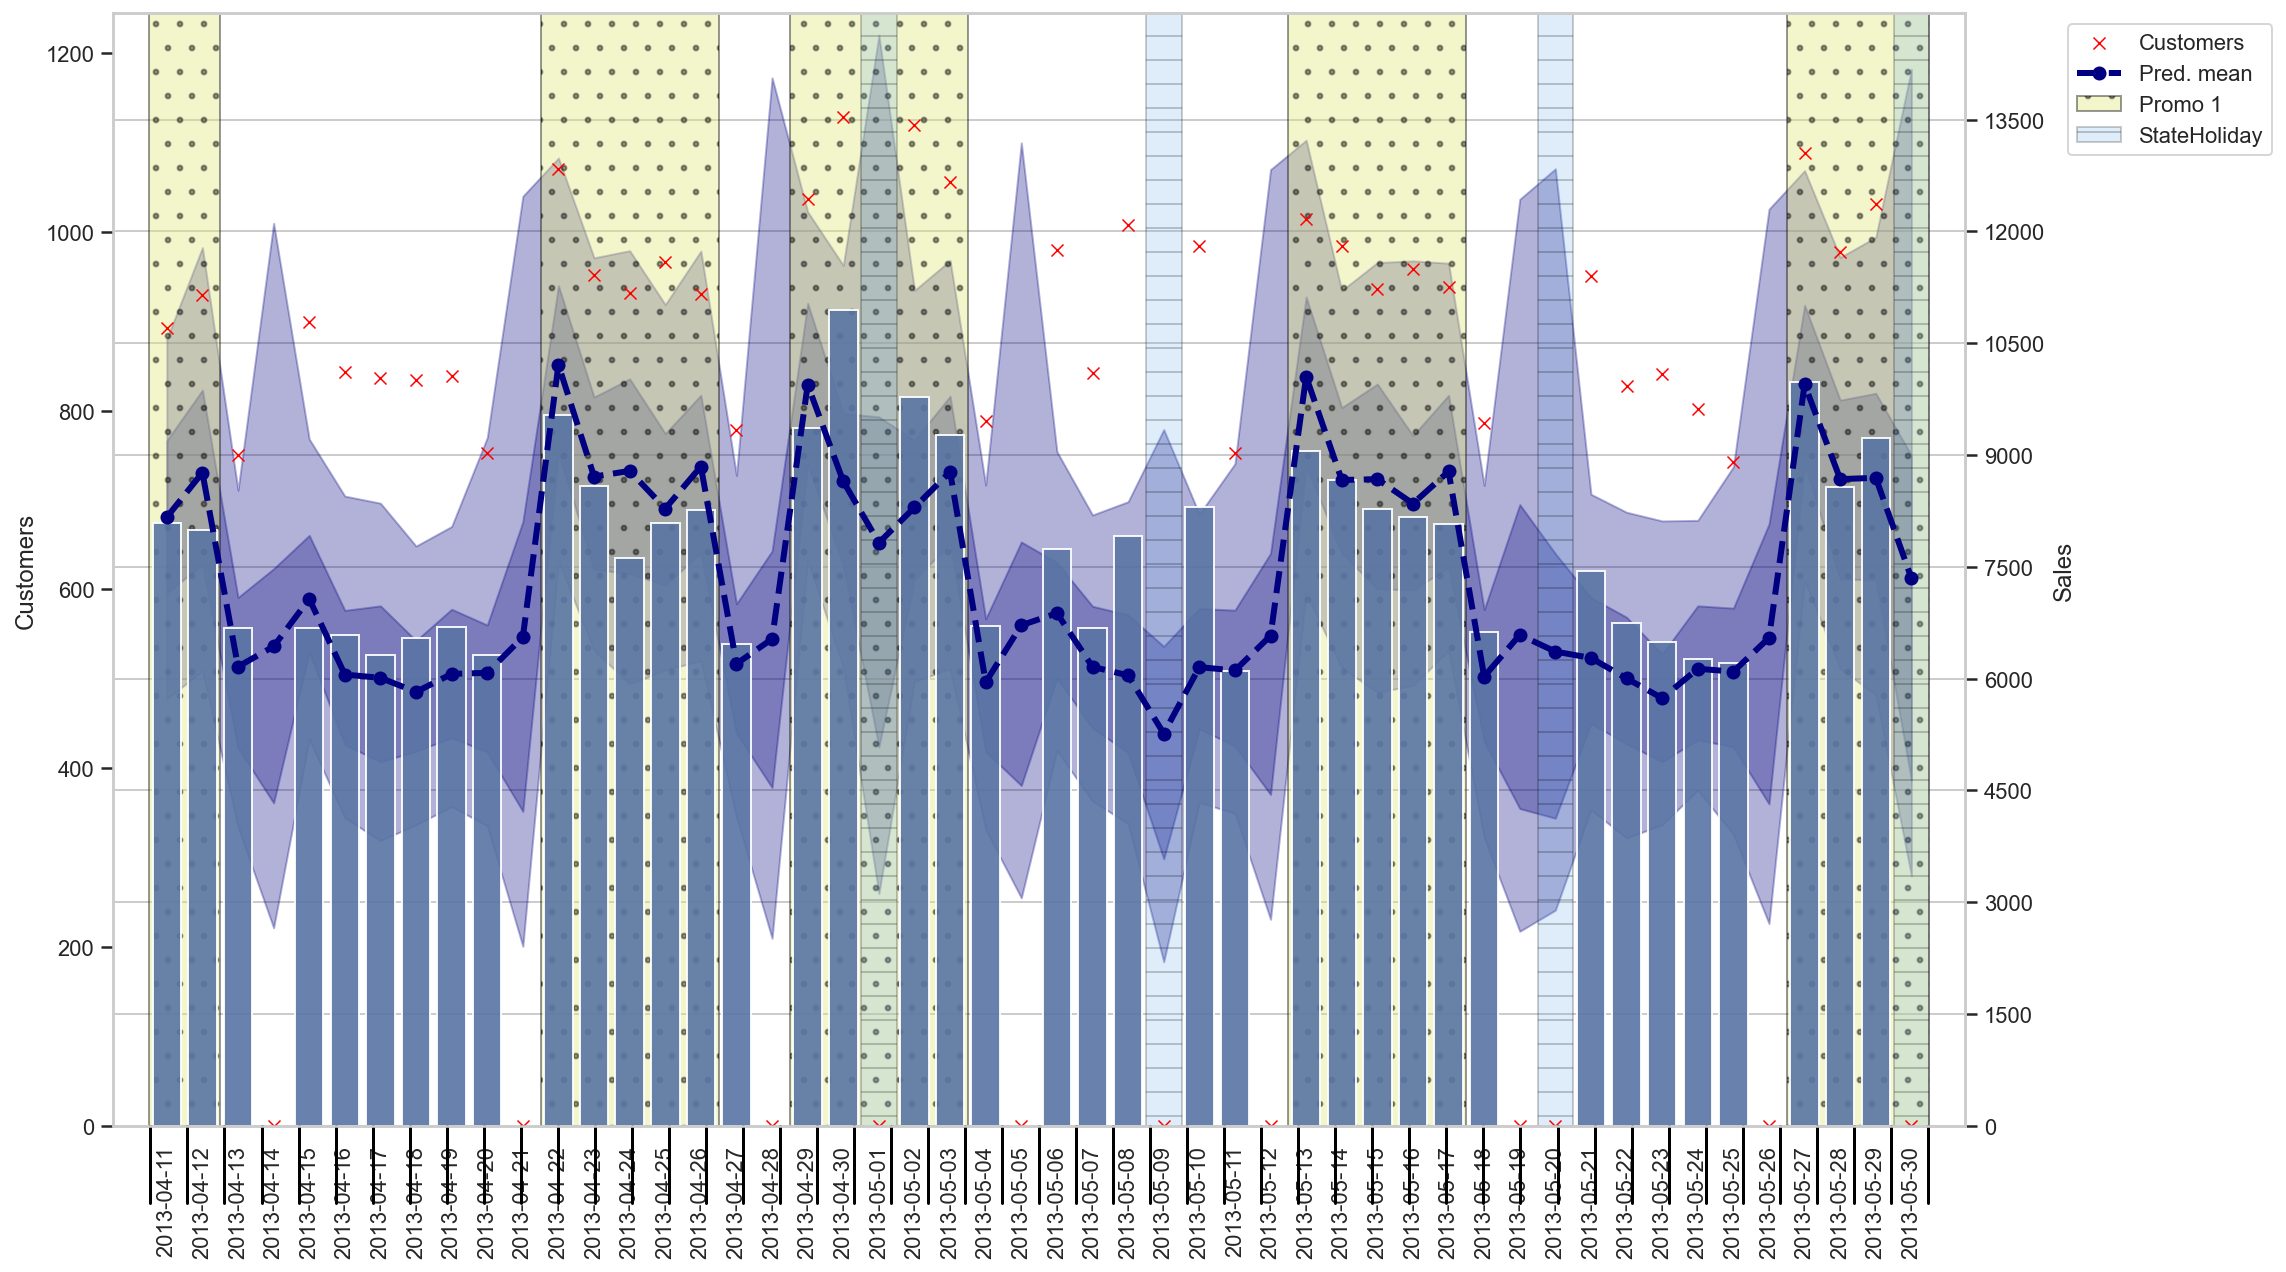

In [27]:
selector = slice(100, 150)
plot_store(store_id, selector);

## Visualize the global weekday effects

In [8]:
coef_mus = pd.read_csv('../data/result/coef_mus.csv')
coef_mus = coef_mus.rename(columns = {str(i): c for i, c in enumerate(df_edf.columns[2:-1])})

In [9]:
coef_mus = coef_mus.filter(regex='DayOfWeek.*')

In [10]:
coef_mus = coef_mus.assign(idx=np.arange(len(coef_mus))).melt(id_vars='idx').drop(columns='idx')

In [11]:
coef_mus['value'] = coef_mus['value'].apply(np.exp)

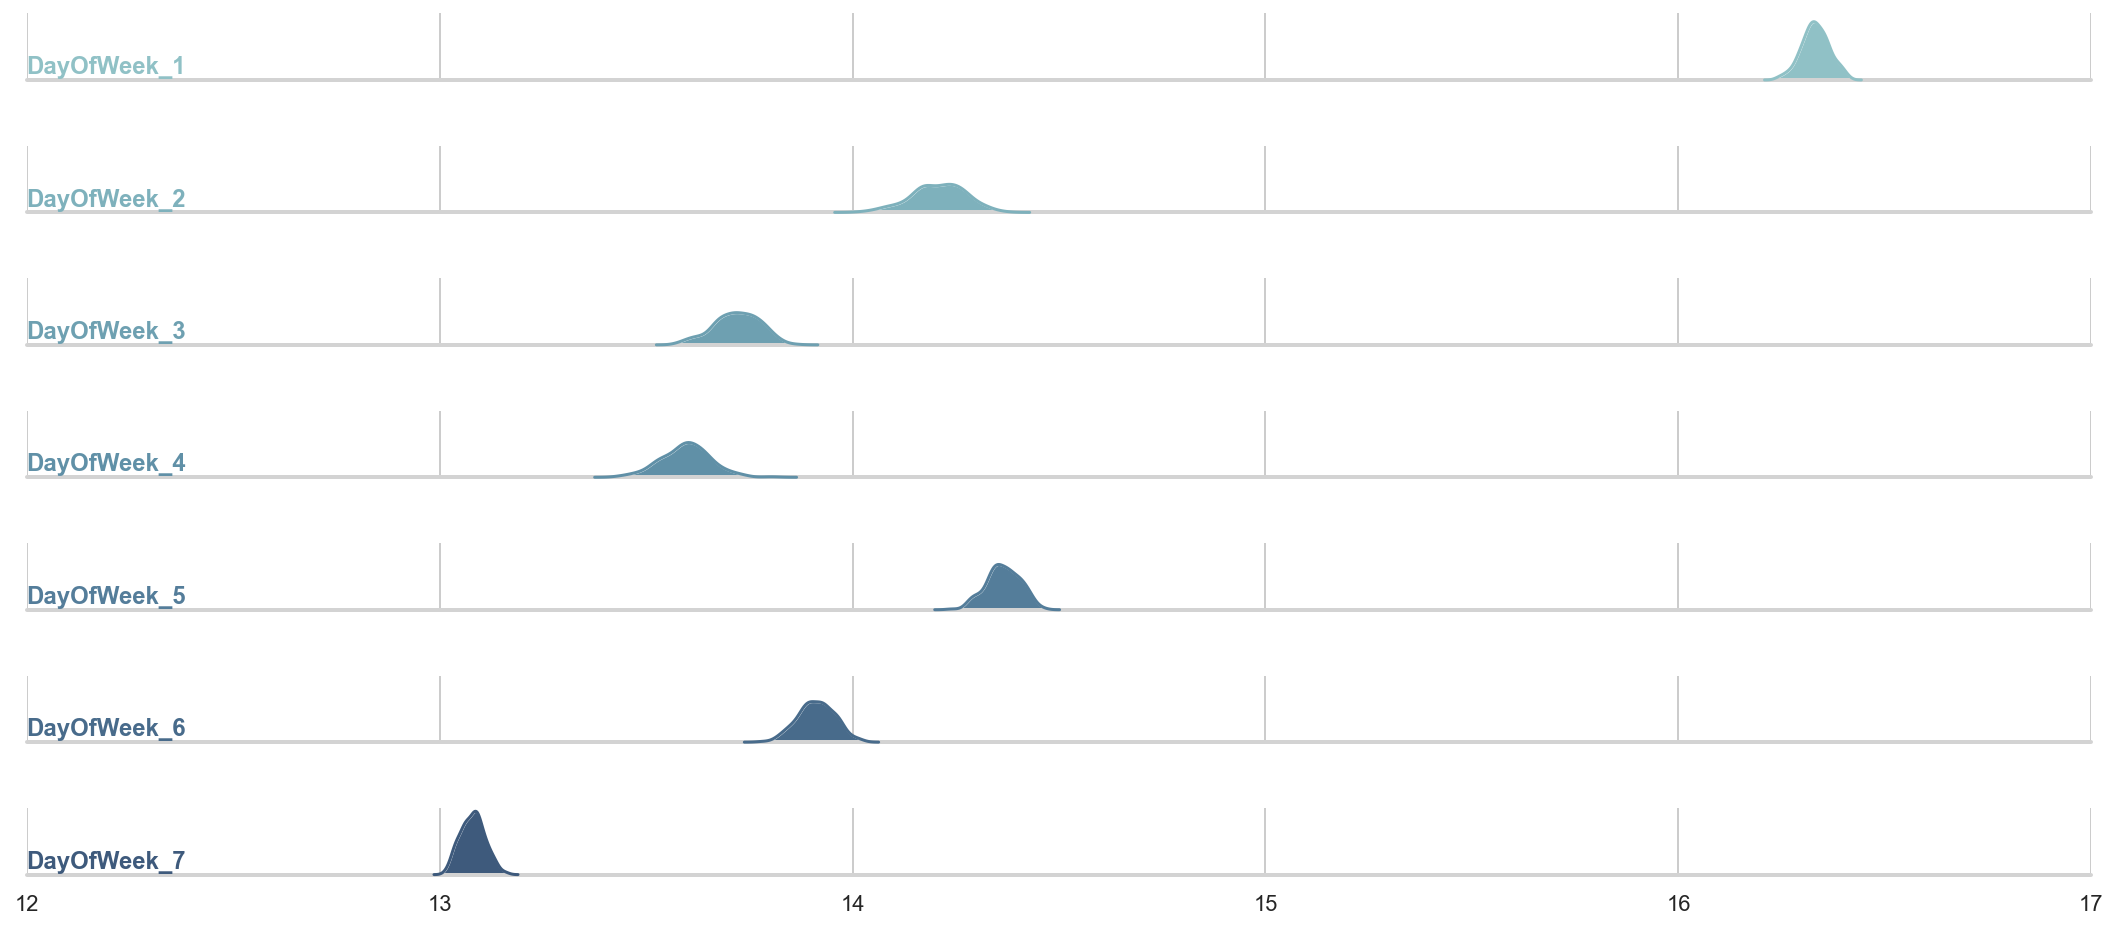

In [12]:
plot_densities(coef_mus, xlim=(12,17))

## Compare with mean effects of the individual stores

In [13]:
mean_weekdays = df_stats.query("site == 'coefs' and metric == 'mean'")
mean_weekdays = mean_weekdays.filter(regex='DayOfWeek.*').assign(idx=np.arange(len(mean_weekdays))).melt(id_vars='idx').drop(columns='idx')

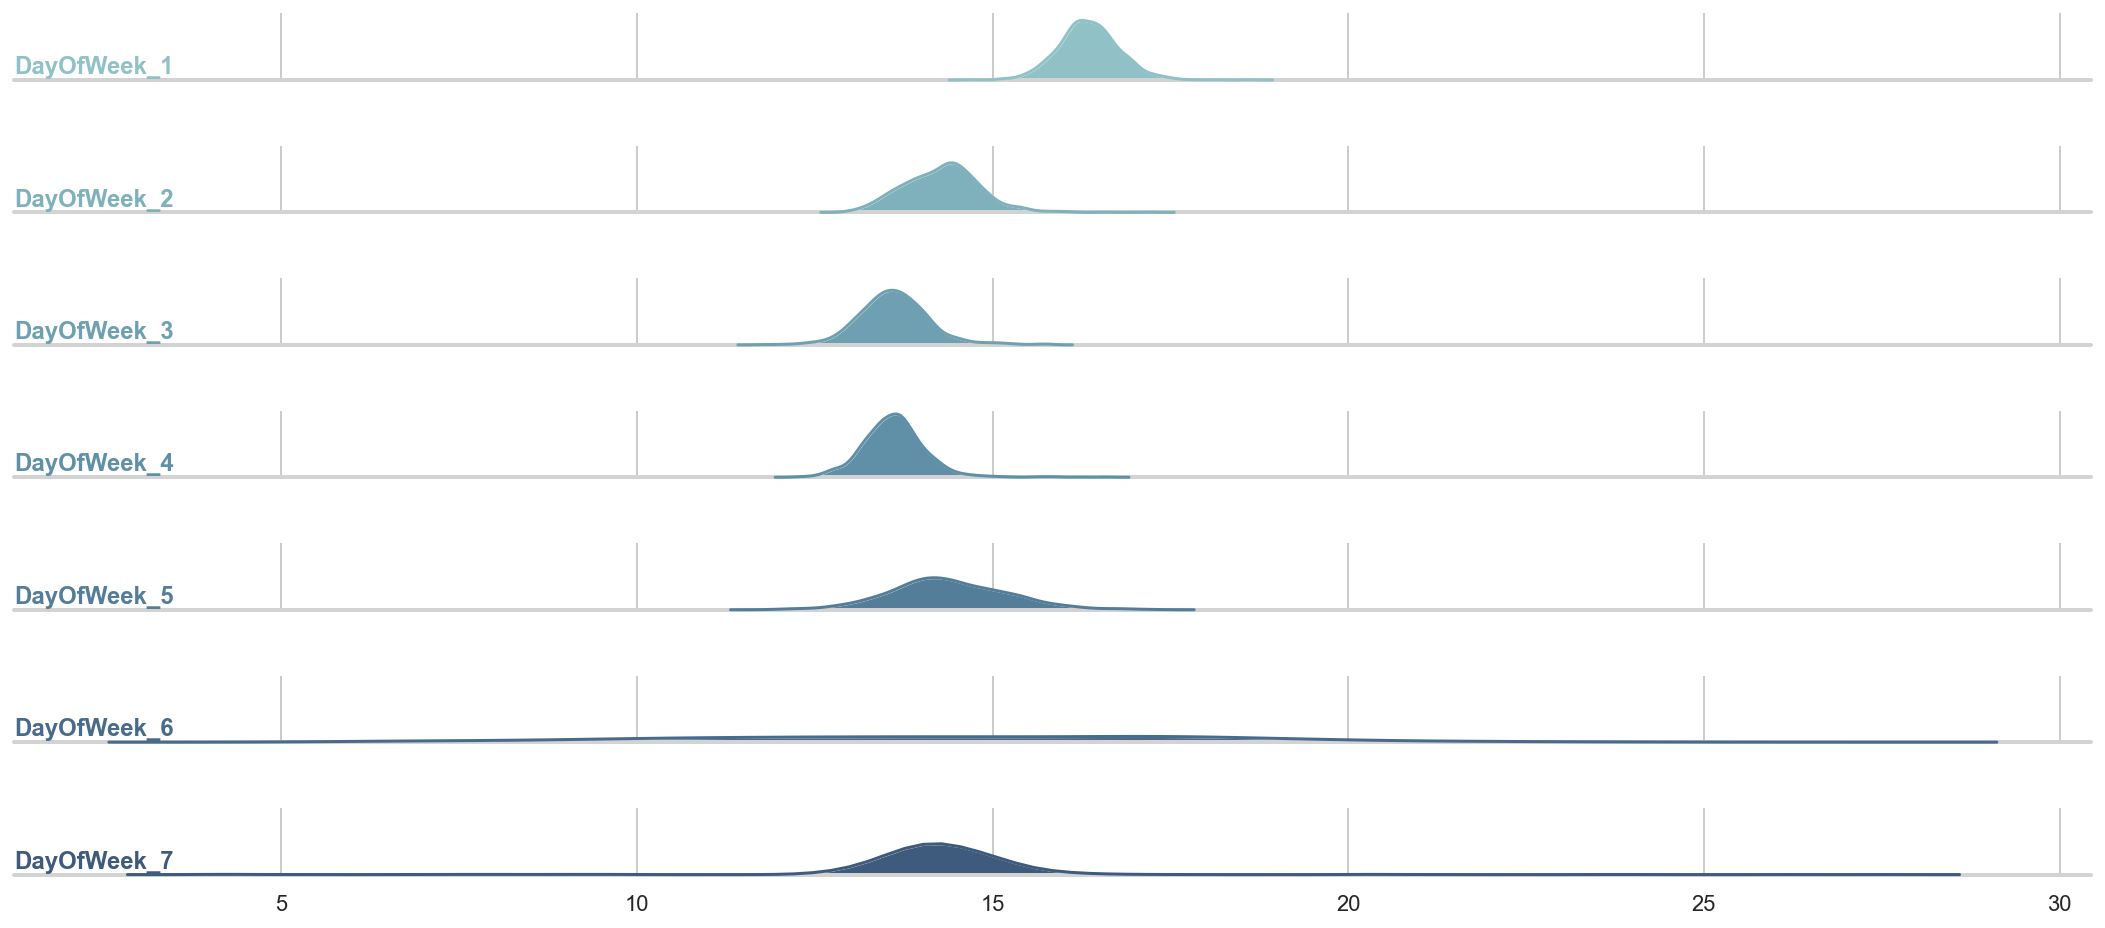

In [14]:
plot_densities(mean_weekdays)

## Visualize the mean promotion effect of the individual stores

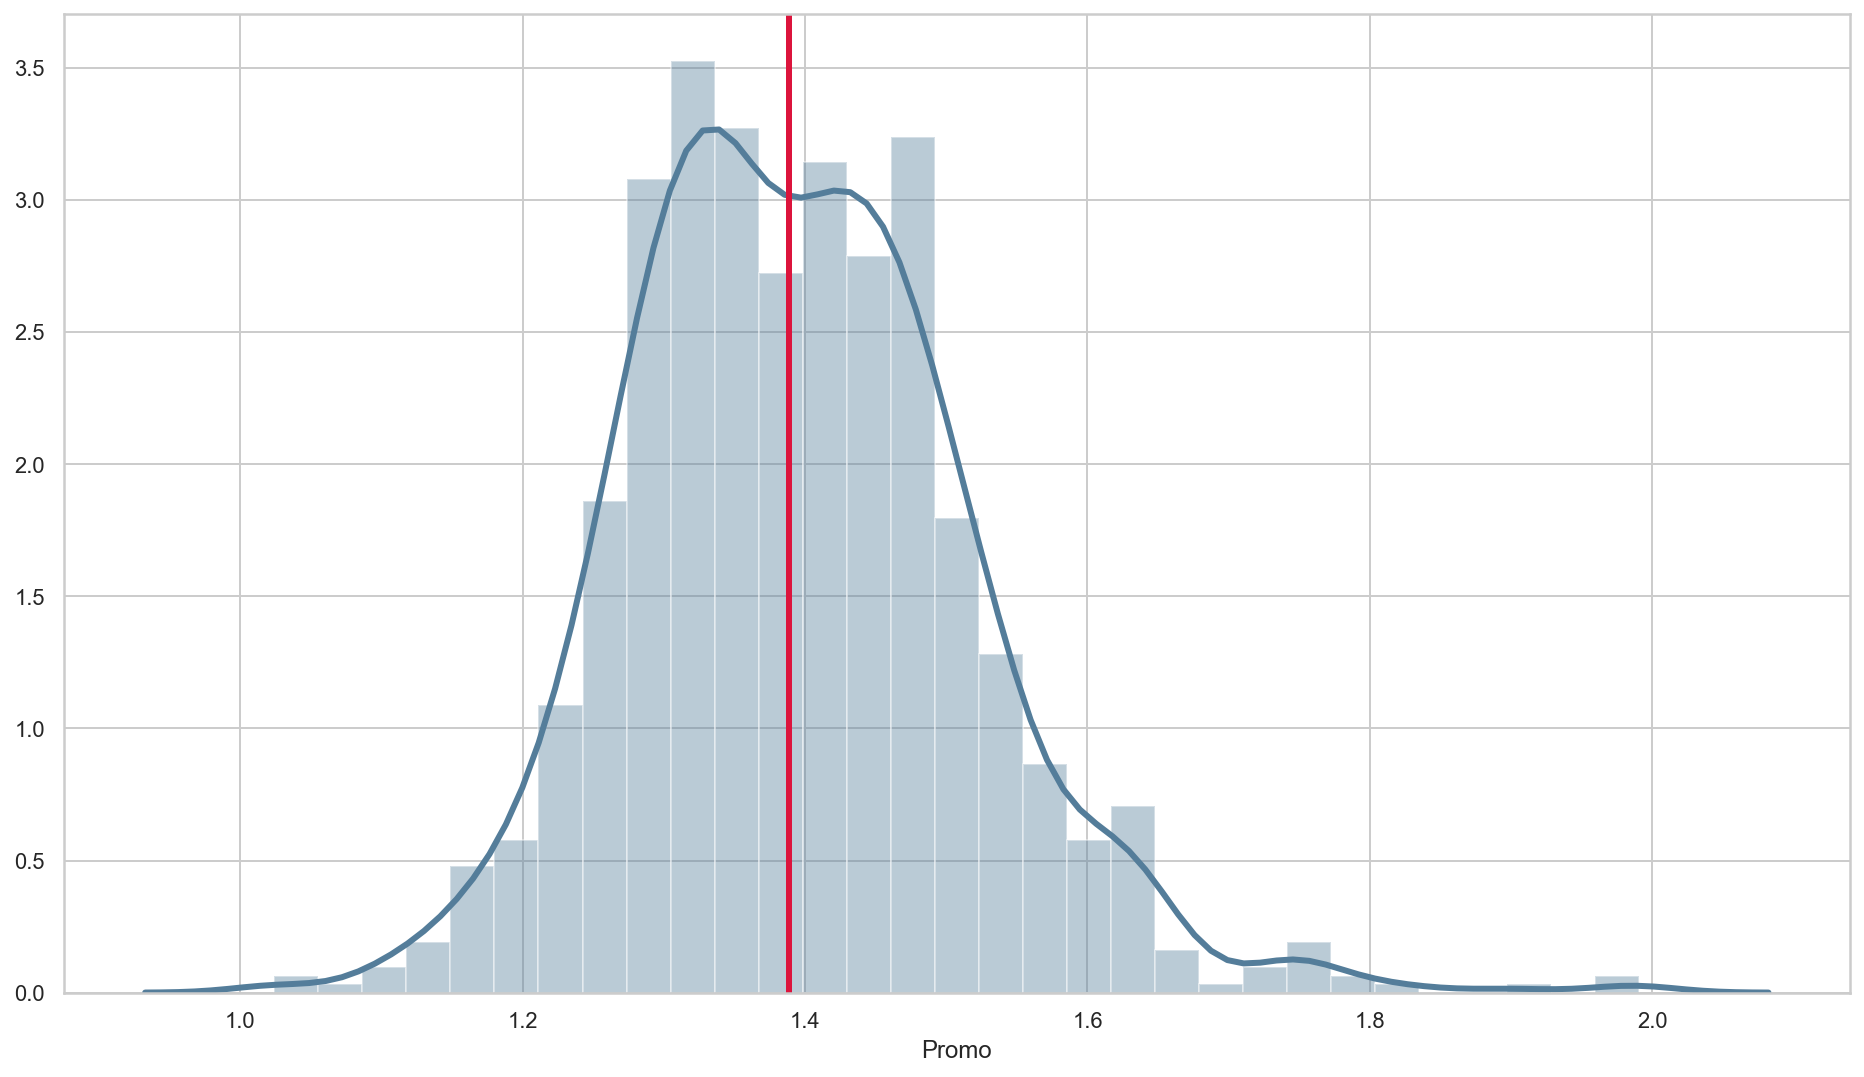

In [15]:
mean_promos = df_stats.query("site == 'coefs' and metric == 'mean'")["Promo"]
sns.distplot(mean_promos, kde_kws=dict(lw=3.), color=sns.cubehelix_palette(10, rot=-.25, light=.7)[4])
plt.axvline(np.median(mean_promos), lw=3, color='crimson');